In [122]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
#!pip install nltk
#nltk.download('punkt')
import seaborn as sns
from collections import Counter
#!pip install wordcloud
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam.csv')

In [4]:
df.sample(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4778,ham,O we cant see if we can join denis and mina? O...,NaN,NaN,NaN
4380,ham,Mathews or tait or edwards or anderson,NaN,NaN,NaN
185,ham,Hello handsome ! Are you finding that job ? No...,NaN,NaN,NaN
4674,spam,"Hi babe its Chloe, how r u? I was smashed on s...",NaN,NaN,NaN
5474,ham,Where's mummy's boy ? Is he being good or bad ...,NaN,NaN,NaN
3358,spam,Sorry I missed your call let's talk when you h...,NaN,NaN,NaN
4513,ham,"Sure, whenever you show the fuck up &gt;:(",NaN,NaN,NaN
2534,ham,Ok enjoy . R u there in home.,NaN,NaN,NaN
2786,ham,cThen i thk shd b enuff.. Still got conclusion...,NaN,NaN,NaN
4946,spam,Great News! Call FREEFONE 08006344447 to claim...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning
### The process of identifying and correcting errors and inconsistencies in a dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Dropping last 3 columns because they have mostly null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(15)

,v1,v2
3977,ham,Reason is if the team budget is available at l...
2682,ham,I got a call from a landline number. . . I am ...
3248,ham,"Sorry, I can't help you on this."
4791,ham,Gd luck 4 ur exams :-)
1310,ham,"I.ll always be there, even if its just in spir..."
2596,ham,No i'm not gonna be able to. || too late notic...
2697,ham,Can you use foreign stamps for whatever you se...
5317,ham,"K, fyi I'm back in my parents' place in south ..."
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
3783,ham,Dear got train and seat mine lower seat


In [8]:
# Renaming the columns for better understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(15)

,target,text
1094,ham,Now only i reached home. . . I am very tired n...
4044,ham,If You mean the website. Yes.
1038,ham,"Edison has rightly said, \A fool can ask more ..."
3703,ham,Kent vale lor... ÌÏ wait 4 me there ar?
4306,ham,I guess it is useless calling u 4 something im...
336,ham,Cool. So how come you havent been wined and di...
3399,spam,"As a valued customer, I am pleased to advise y..."
1924,ham,Ok
255,ham,Don't necessarily expect it to be done before ...
605,ham,TaKe CaRE n gET WeLL sOOn


In [13]:
# Assigning ham=0 and spam=1
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# Checking for duplicate values
df.duplicated().sum()

403

In [18]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis
### Analyzing and summarizing data to gain insights and understand its characteristics.

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

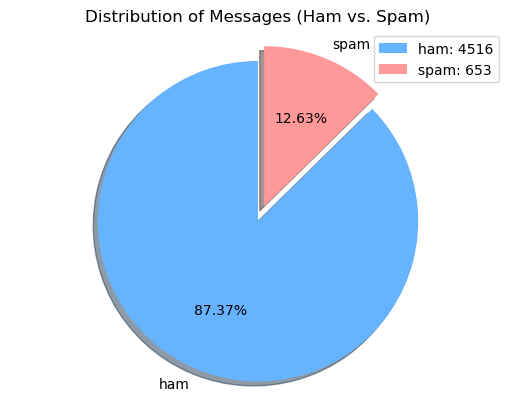

In [54]:
# Creating a pie chart showing the distribution of messages (spam v/s ham)
data = df['target'].value_counts()
labels = ['ham', 'spam']
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%0.2f%%', startangle=90, colors=colors, explode=explode, shadow=True)

ax.axis('equal')
plt.title('Distribution of Messages (Ham vs. Spam)')

plt.legend(loc="upper right", labels=['%s: %d' % (l, s) for l, s in zip(labels, data)])
plt.show()
# Conclusion : imbalanced data

In [36]:
df['num_of_characters'] = df['text'].apply(len)

In [37]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
# ham
df[df['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [47]:
# spam
df[df['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


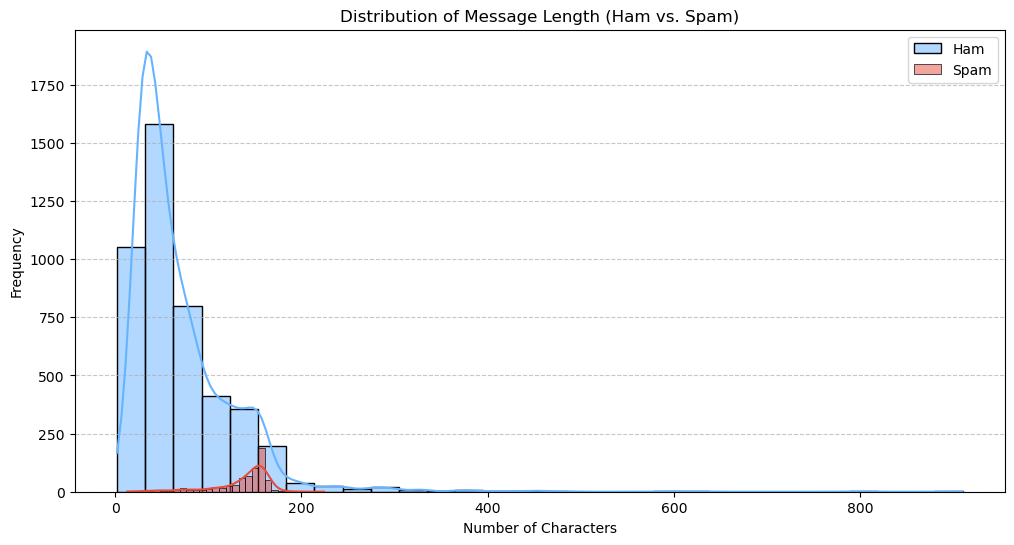

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_of_characters'], bins=30, color='#66b3ff', label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_of_characters'], bins=30, color='#e74c3c', label='Spam', kde=True)

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length (Ham vs. Spam)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


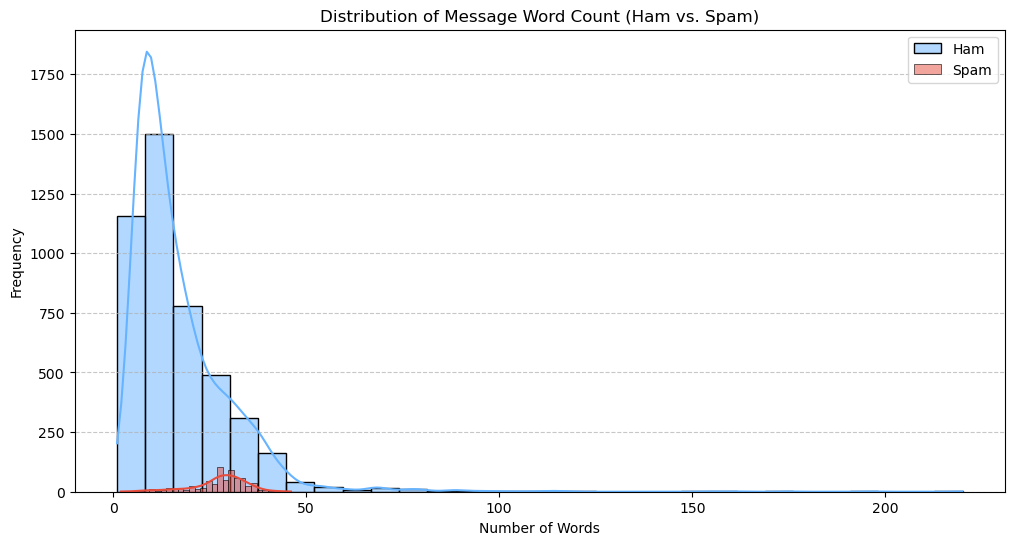

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_of_words'], bins=30, color='#66b3ff', label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_of_words'], bins=30, color='#e74c3c', label='Spam', kde=True)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Message Word Count (Ham vs. Spam)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


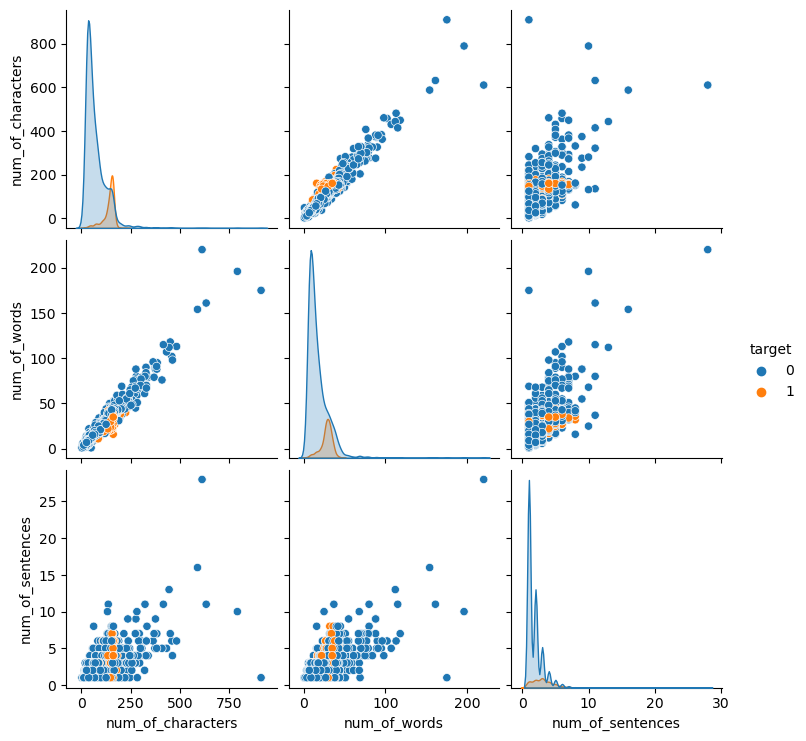

In [62]:
sns.pairplot(df,hue='target')

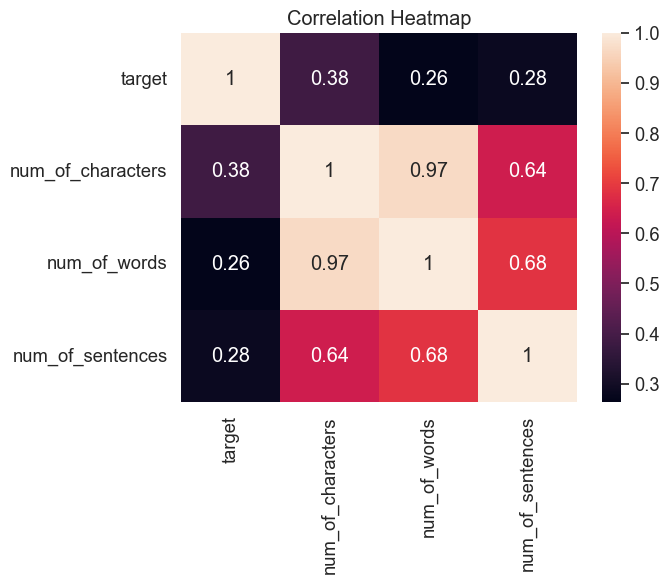

In [74]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 3. Data Preprocessing
###  Preparing raw text data for analysis by cleaning, normalizing, and transforming it.
- Lowercasing (Text Normalization)
- Tokenization (Text Splitting)
- Removing special characters, stop words and punctuation (Text Cleansing)
- Stemming (Root Word Reduction)

In [94]:
ps = PorterStemmer()

def text_transformation(text):

    text = text.lower()

    tokens = nltk.word_tokenize(text)

    tokens = [token for token in tokens if token.isalnum()]

    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]

    stemmed_tokens = [ps.stem(token) for token in tokens]

    transformed_text = " ".join(stemmed_tokens)

    return transformed_text

In [98]:
text_transformation("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [100]:
df['transformed_text'] = df['text'].apply(text_transformation)

In [106]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


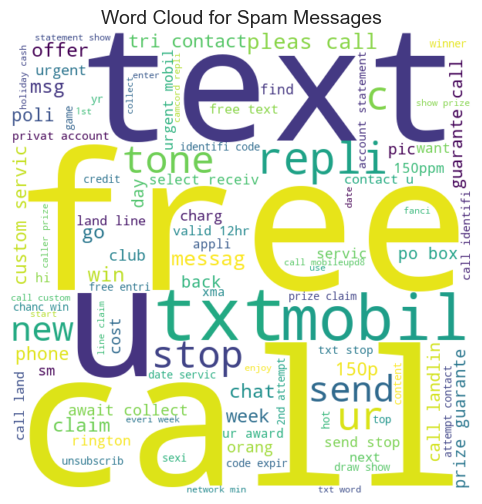

In [114]:
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
spam_wc = WordCloud(width=600, height=600, background_color='white', max_words=100).generate(spam_text)

plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=14)
plt.show()

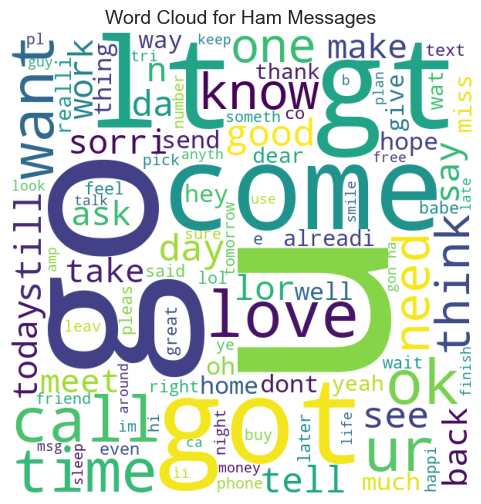

In [119]:
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
ham_wc = WordCloud(width=600, height=600, background_color='white', max_words=100).generate(ham_text)

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Word Cloud for Ham Messages', fontsize=14)
plt.show()

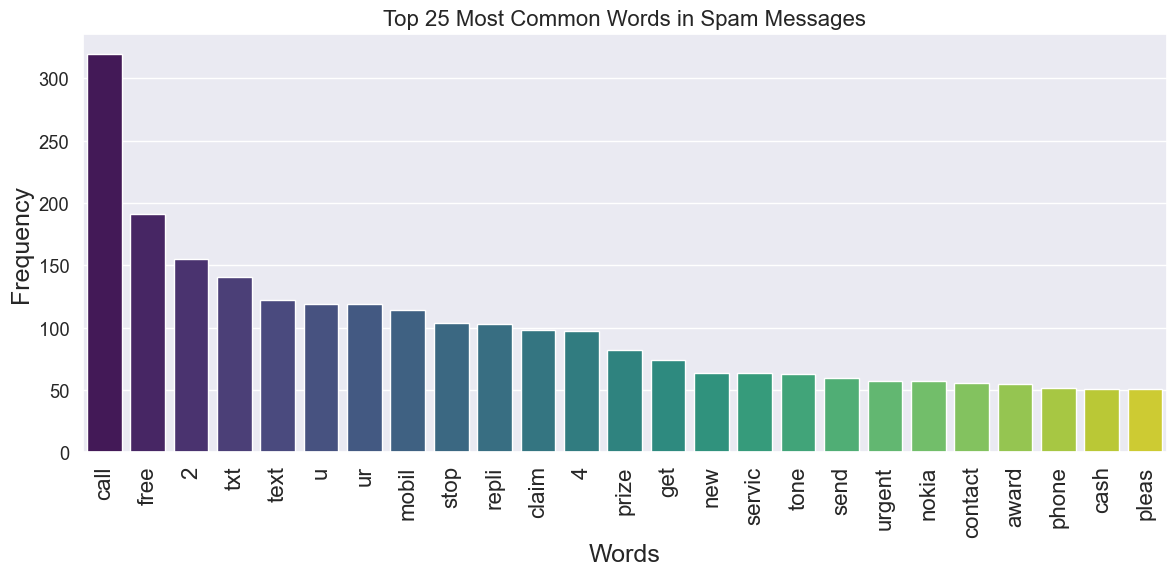

In [134]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    spam_corpus.extend(msg.split())

word_freq = Counter(spam_corpus)

common_words_df = pd.DataFrame(word_freq.most_common(25), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Word', y='Frequency', palette='viridis')
plt.xticks(rotation=90, fontsize=16) 
plt.xlabel('Words', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Top 25 Most Common Words in Spam Messages', fontsize=16)
plt.tight_layout()
plt.show()

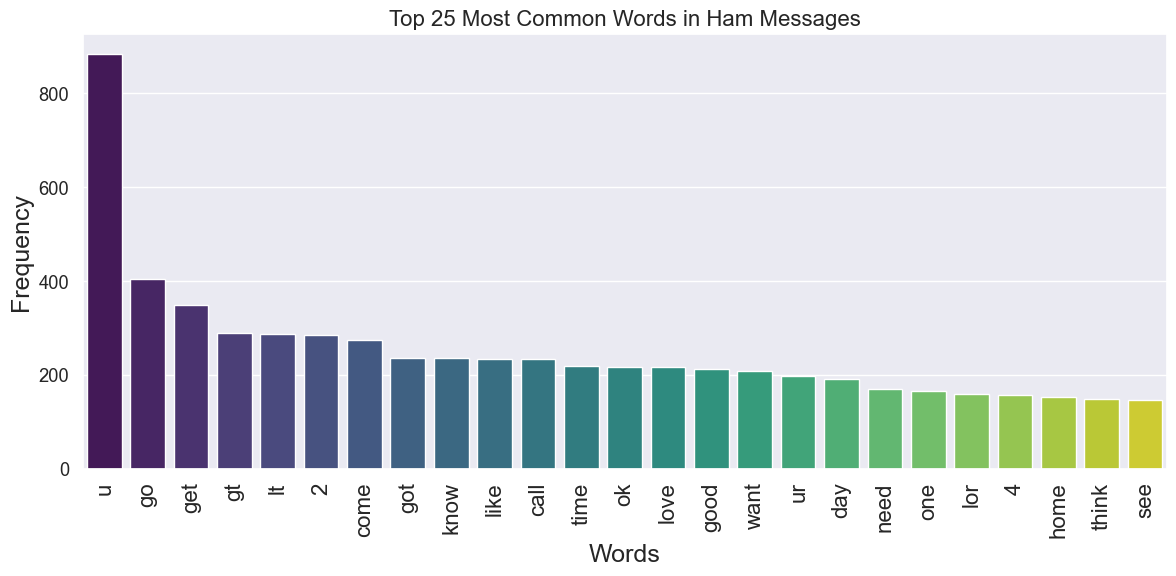

In [137]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    ham_corpus.extend(msg.split())

word_freq = Counter(ham_corpus)

common_words_df = pd.DataFrame(word_freq.most_common(25), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Word', y='Frequency', palette='viridis')
plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Top 25 Most Common Words in Ham Messages', fontsize=16)
plt.tight_layout()
plt.show()


## 4. Model Building
### Developing and training machine learning models on data to make predictions or classifications.

### Text Vectorization : Process of converting textual data into numerical vectors or matrices, making it suitable for machine learning algorithms to process.
#### BoW (Bag of Words) represents text as a collection of words, ignoring their order, and encodes documents based on word frequency or presence.
#### TF-IDF (Term Frequency-Inverse Document Frequency) considers both word frequency and importance, measuring the relative significance of terms in documents by accounting for their rarity across a corpus.

In [175]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [176]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [177]:
X.shape

(5169, 3000)

In [178]:
y = df['target'].values

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=2)

In [181]:
# Naive Bayes is used for text clssification tasks because: 
# 1. efficiencient and effective 
# 2. handles high-dimensional feature spaces, is simple to implement, and works well when there are strong dependencies between words and classes 
# 3. robust to irrelevant features, handles small datasets, and is interpretable 

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [182]:
gnb = GaussianNB() #Continuous data
mnb = MultinomialNB() #Discrete data (text data)
bnb = BernoulliNB() #Binary data

In [183]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [184]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
# Highest precision

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [185]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
# Highest accuracy

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [186]:
# Precision > Accuracy, because unbalanced data : mnb

#Testing different ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install xgboost
from xgboost import XGBClassifier

1. **SupportVectorClassifier (SVC):**
   - A powerful classifier used for separating data points into different classes using a hyperplane.

2. **KNearestNeighborsClassifier (KNC):**
   - Assigns a data point to the majority class among its k-nearest neighbors based on distance metrics.

3. **MultinomialNaiveBayesClassifier (NB):**
   - A probabilistic classifier commonly used for text classification, assuming conditional independence of features.

4. **DecisionTreeClassifier (DT):**
   - Builds a tree-like structure to make decisions by splitting data based on feature values.

5. **LogisticRegressionClassifier (LR):**
   - Models the probability of an instance belonging to a class using a linear approach.

6. **RandomForestClassifier (RF):**
   - An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.

7. **AdaBoostClassifier (AdaBoost):**
   - An ensemble technique that combines weak classifiers by assigning weights to misclassified instances.

8. **BaggingClassifier (BgC):**
   - An ensemble technique that builds multiple base models on subsets of the training data and combines their predictions to reduce variance.

9. **ExtraTreesClassifier (ETC):**
   - An ensemble method similar to Random Forest but with additional randomness in the tree-building process.

10. **GradientBoostingClassifier (GBDT):**
    - An ensemble technique that builds a sequence of decision trees to correct errors, leading to improved accuracy.

11. **XGBoostClassifier (xgb):**
    - A highly efficient and popular gradient boosting library known for strong performance on various machine learning tasks.

In [228]:
support_vector_classifier = SVC(kernel='sigmoid', gamma=1.0)
k_nearest_neighbors_classifier = KNeighborsClassifier()
multinomial_naive_bayes_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
logistic_regression_classifier = LogisticRegression(solver='liblinear', penalty='l1')
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=2)
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=2)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=2)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=50, random_state=2)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgboost_classifier = XGBClassifier(n_estimators=50, random_state=2)

In [229]:
classifiers = {
    'SupportVectorClassifier': support_vector_classifier,
    'KNearestNeighborsClassifier': k_nearest_neighbors_classifier, 
    'MultinomialNaiveBayesClassifier': multinomial_naive_bayes_classifier, 
    'DecisionTreeClassifier': decision_tree_classifier, 
    'LogisticRegressionClassifier': logistic_regression_classifier, 
    'RandomForestClassifier': random_forest_classifier, 
    'AdaBoostClassifier': ada_boost_classifier, 
    'BaggingClassifier': bagging_classifier, 
    'ExtraTreesClassifier': extra_trees_classifier,
    'GradientBoostingClassifier': gradient_boosting_classifier,
    'XGBoostClassifier': xgboost_classifier
}

In [230]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [231]:
train_classifier(support_vector_classifier,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [217]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SupportVectorClassifier
Accuracy :  0.9758220502901354
Precision :  0.9747899159663865


C:\Users\91700\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KNearestNeighborsClassifier
Accuracy :  0.9052224371373307
Precision :  1.0
For  MultinomialNaiveBayesClassifier
Accuracy :  0.9709864603481625
Precision :  1.0
For  DecisionTreeClassifier
Accuracy :  0.9274661508704062
Precision :  0.8118811881188119
For  LogisticRegressionClassifier
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703
For  RandomForestClassifier
Accuracy :  0.9748549323017408
Precision :  0.9827586206896551
For  AdaBoostClassifier
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
For  BaggingClassifier
Accuracy :  0.9574468085106383
Precision :  0.8671875
For  ExtraTreesClassifier
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406
For  GradientBoostingClassifier
Accuracy :  0.9477756286266924
Precision :  0.92
For  XGBoostClassifier
Accuracy :  0.9661508704061895
Precision :  0.9256198347107438


In [232]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [236]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KNearestNeighborsClassifier,Accuracy,0.905222
1,MultinomialNaiveBayesClassifier,Accuracy,0.970986
2,RandomForestClassifier,Accuracy,0.974855
3,SupportVectorClassifier,Accuracy,0.975822
4,ExtraTreesClassifier,Accuracy,0.974855
5,LogisticRegressionClassifier,Accuracy,0.958414
6,AdaBoostClassifier,Accuracy,0.960348
7,XGBoostClassifier,Accuracy,0.966151
8,GradientBoostingClassifier,Accuracy,0.947776
9,BaggingClassifier,Accuracy,0.957447


<Figure size 1000x600 with 0 Axes>

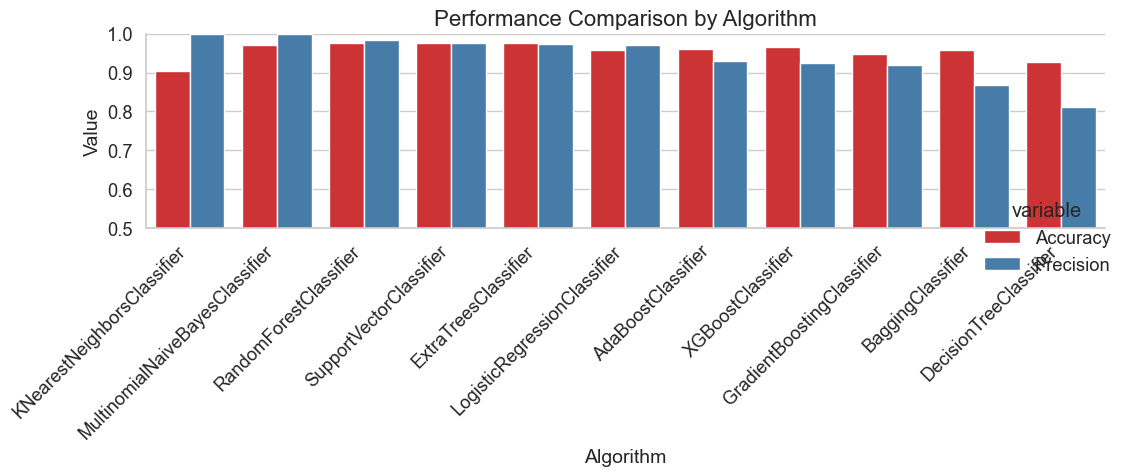

In [237]:
custom_palette = sns.color_palette("Set1")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5,
    palette=custom_palette,
    aspect=2,
)

plt.ylim(0.5, 1.0)

plt.xticks(rotation=45, ha="right")

plt.title('Performance Comparison by Algorithm', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Value', fontsize=14)

plt.tight_layout()
plt.show()

In [205]:
# To improve the model, we change the max_features(restrict number of most frequent words) parameter of TfIdf

In [238]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [239]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [240]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [241]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [242]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [243]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNearestNeighborsClassifier,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,MultinomialNaiveBayesClassifier,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RandomForestClassifier,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SupportVectorClassifier,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ExtraTreesClassifier,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LogisticRegressionClassifier,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoostClassifier,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XGBoostClassifier,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
8,GradientBoostingClassifier,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BaggingClassifier,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [ ]:
# Voting Classifier : Combination of best-performing classifiers
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [248]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [249]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [517]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [254]:
# Applying stacking : Weightage of each algo
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [255]:
from sklearn.ensemble import StackingClassifier

In [256]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

#Conclusion - MNB is the best performing

In [259]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))